# Problem 1: MixUp Cats and Dogs

In [6]:
from fastai.vision.all import *

In [7]:
path = untar_data(URLs.PETS) / 'images'

In [8]:
def is_cat(x):
    return x[0].isupper()

In [9]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224),
    num_workers=0
)

## MixUp

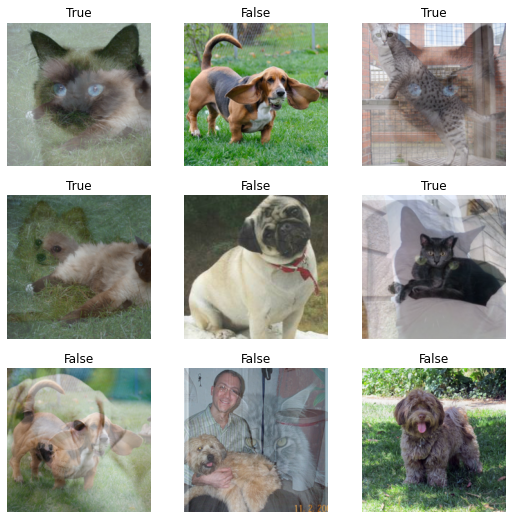

In [10]:
mixup = MixUp(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=mixup) as learn:
    learn.epoch, learn.training = 0, True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_, axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(mixup.x,mixup.y), ctxs=axs.flatten())

In [11]:
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fine_tune(10, cbs=mixup)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.634108,0.092154,0.976319,0.023681,01:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.469364,0.077508,0.994587,0.005413,01:14
1,0.420766,0.062307,0.991881,0.008119,01:14
2,0.377951,0.074884,0.987821,0.012179,01:14
3,0.358493,0.064361,0.993911,0.006089,01:14
4,0.347028,0.050839,0.994587,0.005413,01:14
5,0.336780,0.064598,0.994587,0.005413,01:14
6,0.326232,0.056993,0.993234,0.006766,01:14
7,0.316246,0.049160,0.993911,0.006089,01:14
8,0.316297,0.056719,0.993911,0.006089,01:14
9,0.315235,0.055806,0.994587,0.005413,01:14


## CutMix

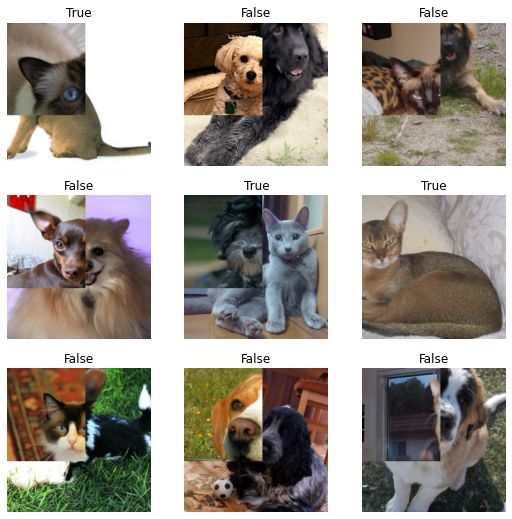

In [12]:
cutmix = CutMix(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=cutmix) as learn:
    learn.epoch,learn.training = 0,True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_,axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(cutmix.x,cutmix.y), ctxs=axs.flatten())

In [13]:
learn = cnn_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fine_tune(10, cbs=cutmix)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.696065,0.076789,0.978349,0.021651,01:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.510288,0.103864,0.983762,0.016238,01:14
1,0.483133,0.103207,0.990528,0.009472,01:14
2,0.437216,0.092952,0.991881,0.008119,01:14
3,0.387744,0.086023,0.993234,0.006766,01:14
4,0.380171,0.075144,0.993911,0.006089,01:14
5,0.378364,0.119572,0.989851,0.010149,01:14
6,0.359353,0.087880,0.991881,0.008119,01:14
7,0.320767,0.081711,0.993911,0.006089,01:14
8,0.336392,0.081450,0.995264,0.004736,01:14
9,0.336380,0.078669,0.995264,0.004736,01:14


## Interpretation of the results

- The performance of resnet18 architecture without any data augmentation techniques was discussed in the textbook and the error rate was around 0.002-0.005.
- As we see from the charts above, CutMix and MixUp do not really improve the performance.
- The above data augmentation techniques provide significant performance boost if we have a small dataset or we do not have a pretrained model. This is not the case in our example, therefore, we see no improvements.